Approach:

1. stricte equal:
    - title equal
2. field based: if (year, title) equal, journal, authors

In [1]:
import crossrefexp as exp

In [2]:
store = exp.MetaDataStore('data/bee.pickle')

429 metadata loaded from `data/bee.pickle`


growth achieved - 30 nodes in the graph. The last generation number is 1.
growth achieved - 429 nodes in the graph. The last generation number is 2.
graphs/Meikle2018_gen2_top20.svg  saved


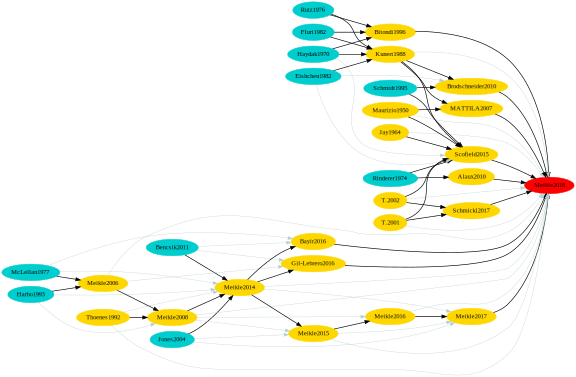

In [3]:
doi = '10.1371/journal.pone.0197589'

# Build the graph and everything:
gr = store.get_refgraphviz( doi, gen=2, top=20, draw_secondary_links=True )
gr

In [6]:
refs_without_doi = []

for metadata in iter( store.values() ):
    
    refs_without_doi.extend( [ref for ref in metadata.get('reference', []) 
                        if "DOI" not in ref] )
    
print(len(refs_without_doi))

4001


In [8]:
couples = [(i, j) for i in range(len(refs_without_doi)) for j in range(i)]

In [17]:
matches = []

for i, j in couples:
    dicoA, dicoB = refs_without_doi[i], refs_without_doi[j]
    
    if 'article-title' not in dicoA or 'article-title' not in dicoB:
        continue
        
    if dicoA['article-title'] == dicoB['article-title']:
        matches.append((dicoA, dicoB))
    
print(len(matches))

19


In [18]:
matches

[({'article-title': 'Bees must have pollen',
   'author': 'C Farrar',
   'first-page': '276',
   'journal-title': 'Glean Bee Cult',
   'key': 'ref51',
   'volume': '62',
   'year': '1934'},
  {'article-title': 'Bees must have pollen',
   'author': 'Farrar',
   'first-page': '276',
   'journal-title': 'Gleanings in Bee Culture',
   'key': '10.1111/j.1365-2311.2007.00904.x-BIB6',
   'volume': '62',
   'year': '1934'}),
 ({'article-title': 'A modelling framework for understanding social insect foraging',
   'author': 'Sumpter',
   'first-page': '131',
   'journal-title': 'Behavioral Ecology and Sociobiology',
   'key': '10.1111/1365-2664.12222-BIB0054|jpe12222-cit-0054',
   'volume': '53',
   'year': '2003'},
  {'article-title': 'A modelling framework for understanding social insect foraging',
   'author': 'DJT Sumpter',
   'first-page': '131',
   'journal-title': 'Behav Ecol Sociobiol',
   'key': 'ref63',
   'volume': '53',
   'year': '2003'}),
 ({'article-title': 'Assessment of the syne

In [7]:
def strict_merge(dictA, dictB):
    common_keys = dictA.keys() & dictB.keys()
    merged_dict = {key:dictA[key] for key in common_keys if dictA[key] == dictB[key]}
    disagree = {key for key in common_keys if dictA[key] != dictB[key]}
    return merged_dict, disagree

In [9]:
len(couples)

8002000

In [86]:
' '.join(matches[0][0].values())

'Apidologie Calis1999 1999 30 111'